In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
def import_vsweep(fpath="schematic/data/dac7_L0.15W1vout-", num=10):
    list_df = []
    for i in range(num):
        df_tmp = pd.read_csv(fpath+str(i+1)+".txt", delimiter="\s+")

        df_tmp["bit"] = df_tmp.index
        df_tmp["v(b0)"] = (df_tmp["v(b0)"] > 1e-3).astype(float)
        df_tmp["v(b1)"] = (df_tmp["v(b1)"] > 1e-3).astype(float)
        df_tmp["v(b2)"] = (df_tmp["v(b2)"] > 1e-3).astype(float)
        df_tmp["v(b3)"] = (df_tmp["v(b3)"] > 1e-3).astype(float)
        df_tmp["v(b4)"] = (df_tmp["v(b4)"] > 1e-3).astype(float)
        df_tmp["v(b5)"] = (df_tmp["v(b5)"] > 1e-3).astype(float)
        df_tmp["v(b6)"] = (df_tmp["v(b6)"] > 1e-3).astype(float)
        df_tmp["src"] = np.ones(len(df_tmp.iloc[:, [1]]))*i
        df_tmp["lsb"] = df_tmp["i(vbias)"]/(3*2**5)
    # my_df = pd.read_csv("sample_data/mcdactut1.txt", delimiter="\s+")
        df_tmp["dnl"] = np.array([df_tmp.lsb.iloc[0]]+list(df_tmp["i(viout)"].iloc[1:].values - df_tmp["i(viout)"].iloc[0:-1].values))-df_tmp["lsb"]
        df_tmp["inl"] = df_tmp["dnl"].cumsum()
        list_df.append(df_tmp)
        
    return pd.concat(list_df).reset_index(drop=True)

In [3]:
my_df = import_vsweep(fpath="schematic/data/dac7_L"+str(3)+"W"+str(12)+"op-", num=10)
# my_df["bit"] = my_df.index
my_df.tail(20)


,vbias#branch,v(b0),v(b1),v(b2),v(b3),v(b4),v(b5),v(b6),i(vbias),i(viout),v(vout),bit,src,lsb,dnl,inl
300,7.380228e-07,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.380228e-07,1.137069e-07,1.0,12,9.0,7.687737e-09,-6.870301e-10,-2.224550e-08
301,7.380235e-07,1.0,0.0,1.0,1.0,0.0,0.0,0.0,7.380235e-07,1.202859e-07,1.0,13,9.0,7.687745e-09,-1.108687e-09,-2.335419e-08
302,7.380235e-07,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.380235e-07,1.263004e-07,1.0,14,9.0,7.687745e-09,-1.673328e-09,-2.502752e-08
303,7.380243e-07,1.0,1.0,1.0,1.0,0.0,0.0,0.0,7.380243e-07,1.318963e-07,1.0,15,9.0,7.687753e-09,-2.091860e-09,-2.711938e-08
304,7.380220e-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.380220e-07,1.425110e-07,1.0,16,9.0,7.687729e-09,2.926970e-09,-2.419241e-08
305,7.380228e-07,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7.380228e-07,1.500741e-07,1.0,17,9.0,7.687737e-09,-1.246072e-10,-2.431702e-08
306,7.380228e-07,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.380228e-07,1.574450e-07,1.0,18,9.0,7.687737e-09,-3.168082e-10,-2.463382e-08
307,7.380236e-07,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7.380236e-07,1.641992e-07,1.0,19,9.0,7.687745e-09,-9.335813e-10,-2.556740e-08
308,7.380227e-07,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.380227e-07,1.717122e-07,1.0,20,9.0,7.687737e-09,-1.747279e-10,-2.574213e-08
309,7.380235e-07,1.0,0.0,1.0,0.0,1.0,0.0,0.0,7.380235e-07,1.785475e-07,1.0,21,9.0,7.687745e-09,-8.524380e-10,-2.659457e-08


In [36]:
LW_pairs = ([
    (0.25, 12), (0.5, 12), (3, 12),
    (0.25, 9), (0.5, 9), (3, 9),
    (0.25, 6), (0.5, 6), (3, 6),
    (0.25, 4), (0.5, 4), (3, 4),
    (0.25, 3), (0.5, 3), (3, 3),
    (0.25, 1), (0.5, 1), (3, 1),
])

In [33]:
LW_pairs = [(8, 32)]
L_list = []
W_list = []
per_list = []
for each in LW_pairs:
    L_list.append(each[0])
    W_list.append(each[1])
    my_df = import_vsweep(fpath="schematic/data/dac7_LDSW32L8_op-", num=10)
    per_list.append(my_df)

In [31]:
per_list[0]

,vbias#branch,v(b0),v(b1),v(b2),v(b3),v(b4),v(b5),v(b6),i(vbias),i(viout),v(vout),bit,src,lsb,dnl,inl
0,1.561568e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.561568e-07,9.893455e-10,1.0,0,0.0,1.626634e-09,0.000000e+00,0.000000e+00
1,1.561579e-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.561579e-07,1.614296e-09,1.0,1,0.0,1.626645e-09,-1.001694e-09,-1.001694e-09
2,1.561580e-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.561580e-07,2.842569e-09,1.0,2,0.0,1.626645e-09,-3.983728e-10,-1.400067e-09
3,1.561590e-07,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.561590e-07,4.464979e-09,1.0,3,0.0,1.626656e-09,-4.245308e-12,-1.404312e-09
4,1.561579e-07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.561579e-07,5.815082e-09,1.0,4,0.0,1.626645e-09,-2.765424e-10,-1.680855e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1.581167e-07,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.581167e-07,1.792418e-07,1.0,123,9.0,1.647049e-09,-6.295034e-11,-2.435473e-08
1276,1.581159e-07,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.581159e-07,1.807083e-07,1.0,124,9.0,1.647041e-09,-1.805097e-10,-2.453524e-08
1277,1.581167e-07,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.581167e-07,1.822747e-07,1.0,125,9.0,1.647049e-09,-8.061518e-11,-2.461586e-08
1278,1.581167e-07,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.581167e-07,1.837383e-07,1.0,126,9.0,1.647049e-09,-1.835013e-10,-2.479936e-08


Text(0, 0.5, 'INL ($LSB$)')

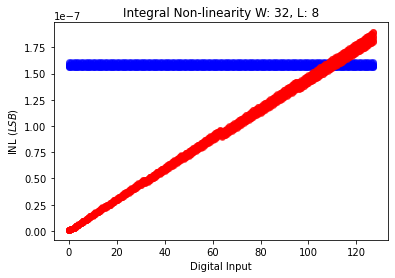

In [34]:
j = -1
fig, ax = plt.subplots()
ax.plot(per_list[j].bit, per_list[j]["i(vbias)"], "bo", alpha=0.5)
ax.plot(per_list[j].bit, per_list[j]["i(viout)"], "ro", alpha=0.5)
ax.set_title("Integral Non-linearity W: "+str(W_list[j])+", L: "+str(L_list[j]))
ax.set_xlabel("Digital Input")
ax.set_ylabel("INL ($LSB$)")

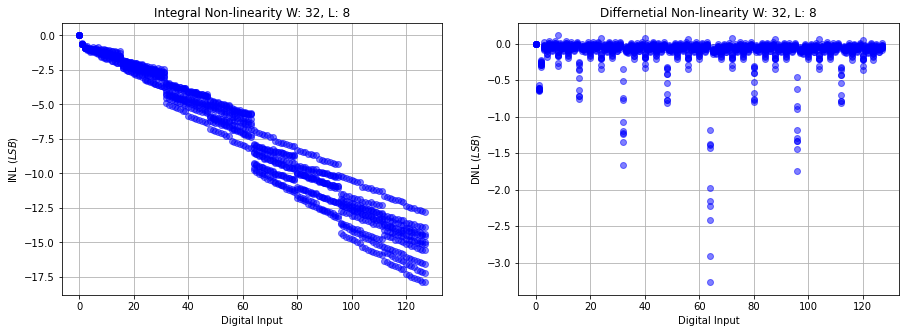

In [35]:
for j in range(len(L_list)):
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    ax[0].plot(per_list[j].bit, per_list[j].inl/per_list[j].lsb, "bo", alpha=0.5)
    ax[0].set_title("Integral Non-linearity W: "+str(W_list[j])+", L: "+str(L_list[j]))
    ax[0].set_xlabel("Digital Input")
    ax[0].set_ylabel("INL ($LSB$)")
    ax[1].plot(per_list[j].bit, per_list[j].dnl/per_list[j].lsb, "bo", alpha=0.5)
    ax[1].set_title("Differnetial Non-linearity W: "+str(W_list[j])+", L: "+str(L_list[j]))
    ax[1].set_xlabel("Digital Input")
    ax[1].set_ylabel("DNL ($LSB$)")
    ax[0].grid()
    ax[1].grid([16, 32, 48, 64, 80, 96, 112])

In [58]:
import grama as gr
import plotnine as pn

X = gr.Intention()

In [57]:
per_list[0]

,vmeas#branch,v(b0),v(b1),v(b2),v(b3),v(b4),v(b5),v(b6),i(vbias),i(viout),v(vout),bit,src,lsb,dnl,inl
0,1.003286e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.663372e-07,1.411891e-09,1.0,0,0.0,1.732679e-09,0.000000e+00,0.000000e+00
1,1.950383e-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.663381e-07,2.441496e-09,1.0,1,0.0,1.732688e-09,-7.030834e-10,-7.030834e-10
2,3.608761e-09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.663381e-07,3.896915e-09,1.0,2,0.0,1.732688e-09,-2.772694e-10,-9.803528e-10
3,5.594586e-09,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.663389e-07,5.876217e-09,1.0,3,0.0,1.732697e-09,2.466048e-10,-7.337480e-10
4,7.391890e-09,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.663381e-07,7.695050e-09,1.0,4,0.0,1.732688e-09,8.614479e-11,-6.476032e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,2.218160e-07,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.648738e-07,2.208079e-07,1.0,123,99.0,1.717436e-09,1.383593e-10,8.273427e-09
12796,2.238218e-07,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.648729e-07,2.227786e-07,1.0,124,99.0,1.717426e-09,2.532497e-10,8.526677e-09
12797,2.256916e-07,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.648738e-07,2.246149e-07,1.0,125,99.0,1.717436e-09,1.188624e-10,8.645539e-09
12798,2.274909e-07,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.648738e-07,2.263814e-07,1.0,126,99.0,1.717435e-09,4.905955e-11,8.694599e-09


In [61]:
(
    per_list[0]
    >> gr.tf_group_by(X.bit)
    >> gr.tf_summarize(
        mean=gr.mean(per_list[0]["i(vibias)"])
    )
)

KeyError: 'i(vibias)'